In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
import sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from itertools import product
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [ ]:
amd = pd.read_csv('/content/AMD (1980 -11.07.2023).csv')
asus = pd.read_csv('/content/ASUS (2000 - 11.07.2023).csv')
intel = pd.read_csv('/content/INTEL (1980 - 11.07.2023).csv')
msi = pd.read_csv('/content/MSI (2023 - 08.04.2024).csv')
nvidia = pd.read_csv('/content/NVIDIA (1999 -11.07.2023).csv')

In [ ]:
amd.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200
1,1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200
2,1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600
3,1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800
4,1980-03-24,0.0,2.916667,2.635417,2.666667,2.666667,436800


In [ ]:
asus.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-05,438.747223,446.535675,436.151154,438.747223,89.092613,6.106176e+09
1,2000-01-06,440.045380,447.833862,436.151154,437.449310,88.829048,6.545984e+09
2,2000-01-07,432.256927,433.555084,425.766632,428.362701,86.983925,4.764317e+09
3,2000-01-10,434.853271,454.324158,434.853271,450.429901,91.464920,1.199988e+10
4,2000-01-11,463.410767,463.410767,442.641449,443.939606,90.146988,1.423350e+10


In [ ]:
intel.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-18,0.325521,0.328125,0.322917,0.322917,0.183718,17068800
1,1980-03-19,0.330729,0.335938,0.330729,0.330729,0.188162,18508800
2,1980-03-20,0.330729,0.334635,0.329427,0.329427,0.187421,11174400
3,1980-03-21,0.322917,0.322917,0.317708,0.317708,0.180754,12172800
4,1980-03-24,0.316406,0.316406,0.311198,0.311198,0.177050,8966400


In [ ]:
msi.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,119.0,122.5,119.0,122.5,117.785713,1688380
1,2023-01-04,122.5,122.5,121.0,122.0,117.304955,1214832
2,2023-01-05,123.0,124.0,122.5,123.5,118.747231,2223376
3,2023-01-06,123.5,124.5,123.0,124.0,119.227989,915155
4,2023-01-09,125.0,126.0,124.5,126.0,121.151016,2305489


In [ ]:
nvidia.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-25,0.442708,0.458333,0.410156,0.453125,0.415743,51048000
1,1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383487,34320000
2,1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382293,24436800
3,1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381098,22752000
4,1999-01-29,0.415365,0.416667,0.395833,0.395833,0.363177,24403200


###checking missing values

In [ ]:

amd.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
asus.isnull().sum()

Date           0
Open         123
High         123
Low          123
Close        123
Adj Close    123
Volume       123
dtype: int64

In [ ]:
intel.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
msi.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
nvidia.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
asus=asus.dropna()
asus

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-05,438.747223,446.535675,436.151154,438.747223,89.092613,6.106176e+09
1,2000-01-06,440.045380,447.833862,436.151154,437.449310,88.829048,6.545984e+09
2,2000-01-07,432.256927,433.555084,425.766632,428.362701,86.983925,4.764317e+09
3,2000-01-10,434.853271,454.324158,434.853271,450.429901,91.464920,1.199988e+10
4,2000-01-11,463.410767,463.410767,442.641449,443.939606,90.146988,1.423350e+10
...,...,...,...,...,...,...,...
5864,2023-07-04,298.500000,302.500000,293.000000,293.500000,293.500000,6.790210e+06
5865,2023-07-05,294.000000,298.000000,292.000000,296.500000,296.500000,1.683419e+06
5866,2023-07-06,298.000000,302.500000,295.500000,300.000000,300.000000,2.966401e+06
5867,2023-07-07,300.000000,300.000000,291.000000,293.000000,293.000000,2.140715e+06


In [ ]:
data_list = [amd, intel, msi, nvidia, asus]
for data in data_list:
  data['Date'] = pd.to_datetime(data['Date'])


In [ ]:
data_list = [amd, intel, msi, nvidia, asus]
names=[0,2,3,4]
index=0
for data in data_list:
  dates=data['Date']
  dates

In [ ]:
data_list = [amd, asus, intel, msi, nvidia]

# Below names list will be used to add a new 'Company' column to every dataset #0: AMD
# 1: ASUS
# 2: INTEL
# 3: MSI
# 4: NVIDIA
names =[0,1,2,3,4]
index=0
for data in data_list:
  dates =data['Date']
  data['Company']=np.repeat (names [index], len(data))
  data['Year']=dates.dt.year
  data['Month'] = dates.dt.month
  data['Day'] = dates.dt.day
  index+=1

In [ ]:

data_list = [amd, asus, intel,msi, nvidia]
test_data = []
train_data = []
for data in data_list:
    train = data[:int(0.8*len(data))]
    test = data[int(0.8*len(data)):]
    train_data.append(train)
    test_data.append(test)
    print(test.shape, train.shape)


(2184, 11) (8735, 11)
(1150, 11) (4596, 11)
(2184, 11) (8735, 11)
(60, 11) (238, 11)
(1231, 11) (4923, 11)


In [ ]:

train_data =pd.concat(train_data)
test_data = pd.concat(test_data)
print(train_data.shape)
print(test_data.shape)


(27227, 11)
(6809, 11)


In [ ]:
x_train=train_data[['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day', 'Company']]
x_test = test_data[['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day', 'Company']]
y_train=train_data['Close']
y_test=test_data['Close']
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(27227, 8)
(6809, 8)
(27227,)
(6809,)


###Descriptive statistical data analysis

In [ ]:
x_train.describe(include='all')

,Open,High,Low,Volume,Year,Month,Day,Company
count,27227.000000,27227.000000,27227.000000,2.722700e+04,27227.000000,27227.000000,27227.000000,27227.000000
mean,60.315613,61.188853,59.626940,2.468755e+08,2001.267014,6.538987,15.755133,1.559922
std,111.856381,113.039237,110.413412,1.077167e+09,10.460180,3.410273,8.744898,1.410846
min,0.000000,0.218750,0.216146,0.000000e+00,1980.000000,1.000000,1.000000,0.000000
25%,3.430000,3.718750,3.593750,3.671470e+06,1993.000000,4.000000,8.000000,0.000000
50%,10.300000,10.500000,10.062500,2.615800e+07,2003.000000,7.000000,16.000000,2.000000
75%,26.700001,26.990000,26.360001,6.002380e+07,2010.000000,9.000000,23.000000,2.000000
max,567.667419,575.104126,547.836243,2.833812e+10,2023.000000,12.000000,31.000000,4.000000


In [ ]:
x_test.describe(include='all')

,Open,High,Low,Volume,Year,Month,Day,Company
count,6809.000000,6809.000000,6809.000000,6.809000e+03,6809.000000,6809.000000,6809.000000,6809.000000
mean,100.937076,102.317686,99.529994,3.692865e+07,2019.400646,6.469526,15.746071,1.559994
std,100.764061,101.881577,99.596936,3.175757e+07,2.417713,3.470243,8.746159,1.410873
min,1.620000,1.690000,1.610000,0.000000e+00,2014.000000,1.000000,1.000000,0.000000
25%,32.799999,33.240002,32.430000,1.586950e+07,2018.000000,3.000000,8.000000,0.000000
50%,53.209999,53.919998,52.410000,3.059510e+07,2020.000000,6.000000,16.000000,2.000000
75%,151.850006,154.660004,148.830002,5.063920e+07,2021.000000,10.000000,23.000000,2.000000
max,435.010010,439.899994,426.739990,3.250584e+08,2024.000000,12.000000,31.000000,4.000000


<Axes: >

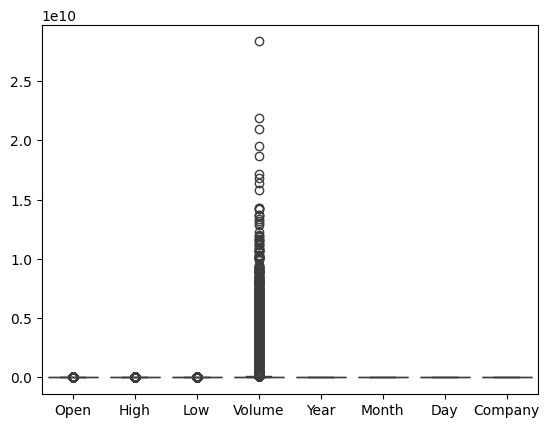

In [ ]:
sns.boxplot(x_train)

<Axes: >

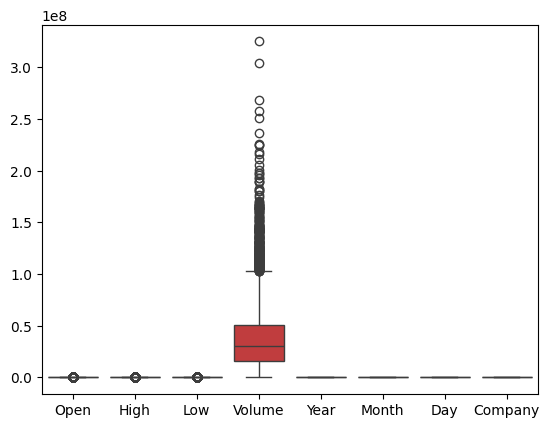

In [ ]:
sns.boxplot(x_test)

In [ ]:
amd.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Year,Month,Day
count,10919,10919.000000,10919.000000,10919.000000,10919.000000,10919.000000,1.091900e+04,10919.0,10919.000000,10919.000000,10919.000000
mean,2001-11-02 08:46:51.686051840,16.842664,17.510743,16.761635,17.138932,17.138932,1.846495e+07,0.0,2001.338126,6.526605,15.738438
min,1980-03-18 00:00:00,0.000000,1.690000,1.610000,1.620000,1.620000,0.000000e+00,0.0,1980.000000,1.000000,1.000000
25%,1991-01-03 12:00:00,4.960000,5.437500,5.125000,5.300000,5.300000,1.226100e+06,0.0,1991.000000,4.000000,8.000000
50%,2001-10-29 00:00:00,9.875000,10.062500,9.630000,9.875000,9.875000,6.833200e+06,0.0,2001.000000,7.000000,16.000000
75%,2012-08-29 12:00:00,16.125000,16.403125,15.805000,16.120001,16.120001,2.284015e+07,0.0,2012.000000,10.000000,23.000000
max,2023-07-10 00:00:00,163.279999,164.460007,156.100006,161.910004,161.910004,3.250584e+08,0.0,2023.000000,12.000000,31.000000
std,NaN,23.317716,23.609612,22.615398,23.121619,23.121619,2.815631e+07,0.0,12.509742,3.422874,8.748574


In [ ]:
asus.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Year,Month,Day
count,5746,5746.000000,5746.000000,5746.000000,5746.000000,5746.000000,5.746000e+03,5746.0,5746.000000,5746.000000,5746.000000
mean,2011-08-26 14:55:25.583014144,290.489678,293.667370,287.055492,290.235818,128.518523,1.016665e+09,1.0,2011.146189,6.584929,15.835712
min,2000-01-05 00:00:00,127.106941,130.196335,127.106941,130.196335,28.863441,0.000000e+00,1.0,2000.000000,1.000000,1.000000
25%,2005-07-07 06:00:00,234.528175,237.000000,231.808762,234.500000,76.379619,1.696000e+06,1.0,2005.000000,4.000000,8.000000
50%,2011-10-05 12:00:00,278.000000,280.000000,275.409851,278.000000,120.188485,3.186387e+06,1.0,2011.000000,7.000000,16.000000
75%,2017-08-10 18:00:00,330.087112,334.000000,326.500000,330.000000,163.233246,8.475086e+08,1.0,2017.000000,10.000000,23.000000
max,2023-07-10 00:00:00,567.667419,575.104126,547.836243,565.188538,314.543518,2.833812e+10,1.0,2023.000000,12.000000,31.000000
std,NaN,75.957579,76.739552,74.935856,75.602517,66.079585,2.177426e+09,0.0,6.866389,3.413409,8.715091


In [ ]:
intel.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Year,Month,Day
count,10919,10919.000000,10919.000000,10919.000000,10919.000000,10919.000000,1.091900e+04,10919.0,10919.000000,10919.000000,10919.000000
mean,2001-11-02 08:46:51.686051840,19.897342,20.169676,19.627548,19.896781,14.668655,5.052754e+07,2.0,2001.338126,6.526605,15.738438
min,1980-03-18 00:00:00,0.218750,0.218750,0.216146,0.216146,0.122972,0.000000e+00,2.0,1980.000000,1.000000,1.000000
25%,1991-01-03 12:00:00,1.343750,1.367188,1.320313,1.343750,0.764502,2.713025e+07,2.0,1991.000000,4.000000,8.000000
50%,2001-10-29 00:00:00,20.350000,20.650000,20.093750,20.370001,12.680091,4.450540e+07,2.0,2001.000000,7.000000,16.000000
75%,2012-08-29 12:00:00,30.115001,30.593750,29.670000,30.066250,19.987983,6.467910e+07,2.0,2012.000000,10.000000,23.000000
max,2023-07-10 00:00:00,75.625000,75.828125,73.625000,74.875000,63.348770,5.677088e+08,2.0,2023.000000,12.000000,31.000000
std,NaN,17.487968,17.729974,17.252020,17.487397,14.781238,3.481933e+07,0.0,12.509742,3.422874,8.748574


In [ ]:
msi.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Year,Month,Day
count,298,298.00000,298.000000,298.000000,298.000000,298.000000,2.980000e+02,298.0,298.000000,298.000000,298.000000
mean,2023-08-22 00:38:39.463087360,166.42953,168.577181,164.082215,166.268456,163.188253,4.573212e+06,3.0,2023.197987,5.825503,15.694631
min,2023-01-03 00:00:00,119.00000,122.500000,119.000000,122.000000,117.304955,6.278910e+05,3.0,2023.000000,1.000000,1.000000
25%,2023-05-05 18:00:00,146.00000,147.125000,145.000000,146.500000,140.862091,2.619778e+06,3.0,2023.000000,3.000000,8.000000
50%,2023-08-22 12:00:00,170.00000,171.500000,168.000000,169.500000,167.750000,3.930778e+06,3.0,2023.000000,5.000000,16.000000
75%,2023-12-07 18:00:00,181.87500,184.000000,179.000000,181.500000,179.375000,5.518807e+06,3.0,2023.000000,9.000000,23.000000
max,2024-04-03 00:00:00,216.00000,216.500000,202.000000,211.000000,204.000000,2.313684e+07,3.0,2024.000000,12.000000,31.000000
std,NaN,20.22837,20.714162,19.507077,19.874694,21.059304,2.988958e+06,0.0,0.399152,3.565135,8.771167


In [ ]:
nvidia.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Year,Month,Day
count,6154,6154.000000,6154.000000,6154.000000,6154.000000,6154.000000,6.154000e+03,6154.0,6154.000000,6154.000000,6154.000000
mean,2011-04-16 13:21:39.837504,34.055888,34.707315,33.394796,34.080465,33.818979,6.120887e+07,4.0,2010.792168,6.497725,15.732044
min,1999-01-25 00:00:00,0.348958,0.355469,0.333333,0.341146,0.313002,1.968000e+06,4.0,1999.000000,1.000000,1.000000
25%,2005-03-08 06:00:00,2.682084,2.768125,2.612500,2.685417,2.463874,3.443320e+07,4.0,2005.000000,4.000000,8.000000
50%,2011-04-14 12:00:00,4.371250,4.443750,4.280000,4.367500,4.024390,5.136085e+07,4.0,2011.000000,6.000000,16.000000
75%,2017-05-25 18:00:00,33.498124,34.356876,32.490626,33.403123,33.137190,7.449690e+07,4.0,2017.000000,9.000000,23.000000
max,2023-07-10 00:00:00,435.010010,439.899994,426.739990,438.079987,438.079987,9.230856e+08,4.0,2023.000000,12.000000,31.000000
std,NaN,67.420090,68.760909,66.069289,67.472837,67.479411,4.385313e+07,0.0,7.064137,3.419204,8.761435


In [ ]:
msi.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Company,Year,Month,Day
0,2023-01-03,119.0,122.5,119.0,122.5,117.785713,1688380,3,2023,1,3
1,2023-01-04,122.5,122.5,121.0,122.0,117.304955,1214832,3,2023,1,4
2,2023-01-05,123.0,124.0,122.5,123.5,118.747231,2223376,3,2023,1,5
3,2023-01-06,123.5,124.5,123.0,124.0,119.227989,915155,3,2023,1,6
4,2023-01-09,125.0,126.0,124.5,126.0,121.151016,2305489,3,2023,1,9


In [ ]:
nvidia.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Year,Month,Day
0,1999-01-25,0.442708,0.458333,0.410156,0.453125,0.415743,51048000,4,1999,1,25
1,1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383487,34320000,4,1999,1,26
2,1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382293,24436800,4,1999,1,27
3,1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381098,22752000,4,1999,1,28
4,1999-01-29,0.415365,0.416667,0.395833,0.395833,0.363177,24403200,4,1999,1,29


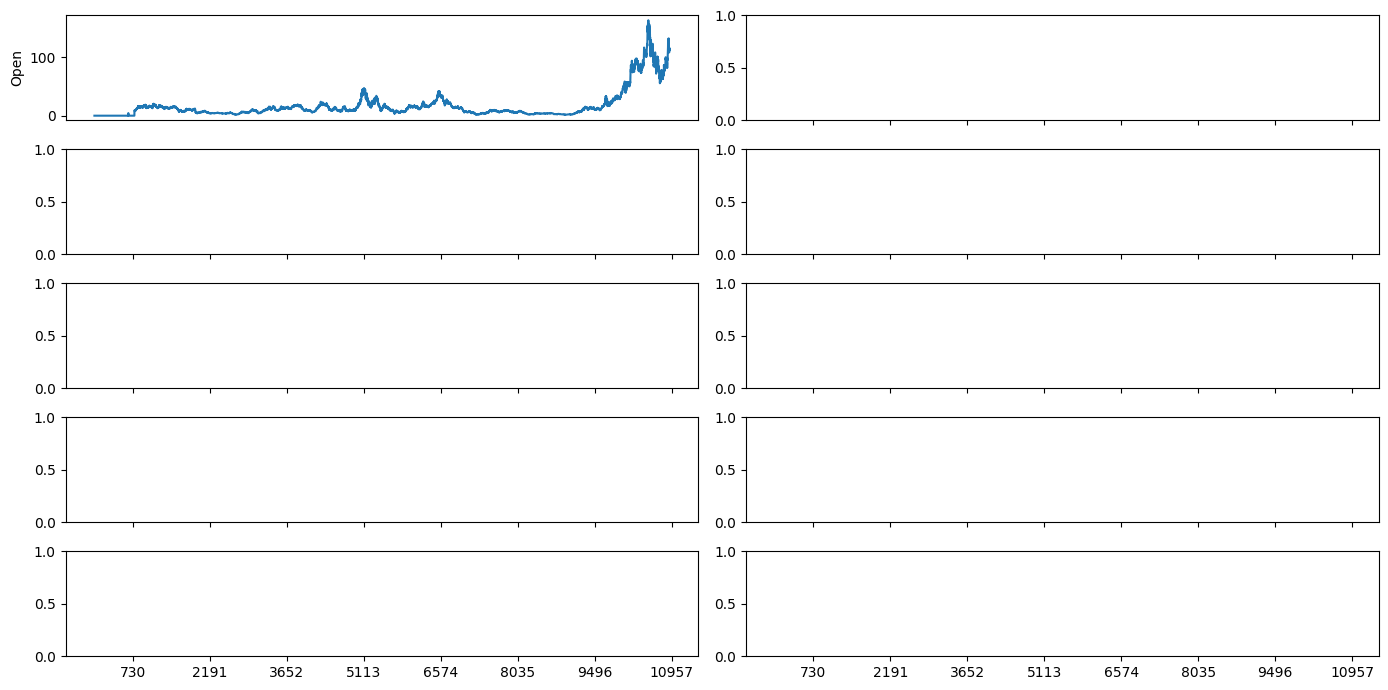

In [ ]:
import matplotlib.dates as mdates
# Plot Line charts
df_plot=amd.drop(columns=['Date'])

ncols=2

nrows = int(round(df_plot.shape[1]/ncols, 0))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 7))
for i, ax in enumerate(fig.axes):
  sns.lineplot(data = df_plot.iloc[:, i], ax=ax)
  ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
  ax.xaxis.set_major_locator(mdates.AutoDateLocator())
  fig.tight_layout()
  plt.show()


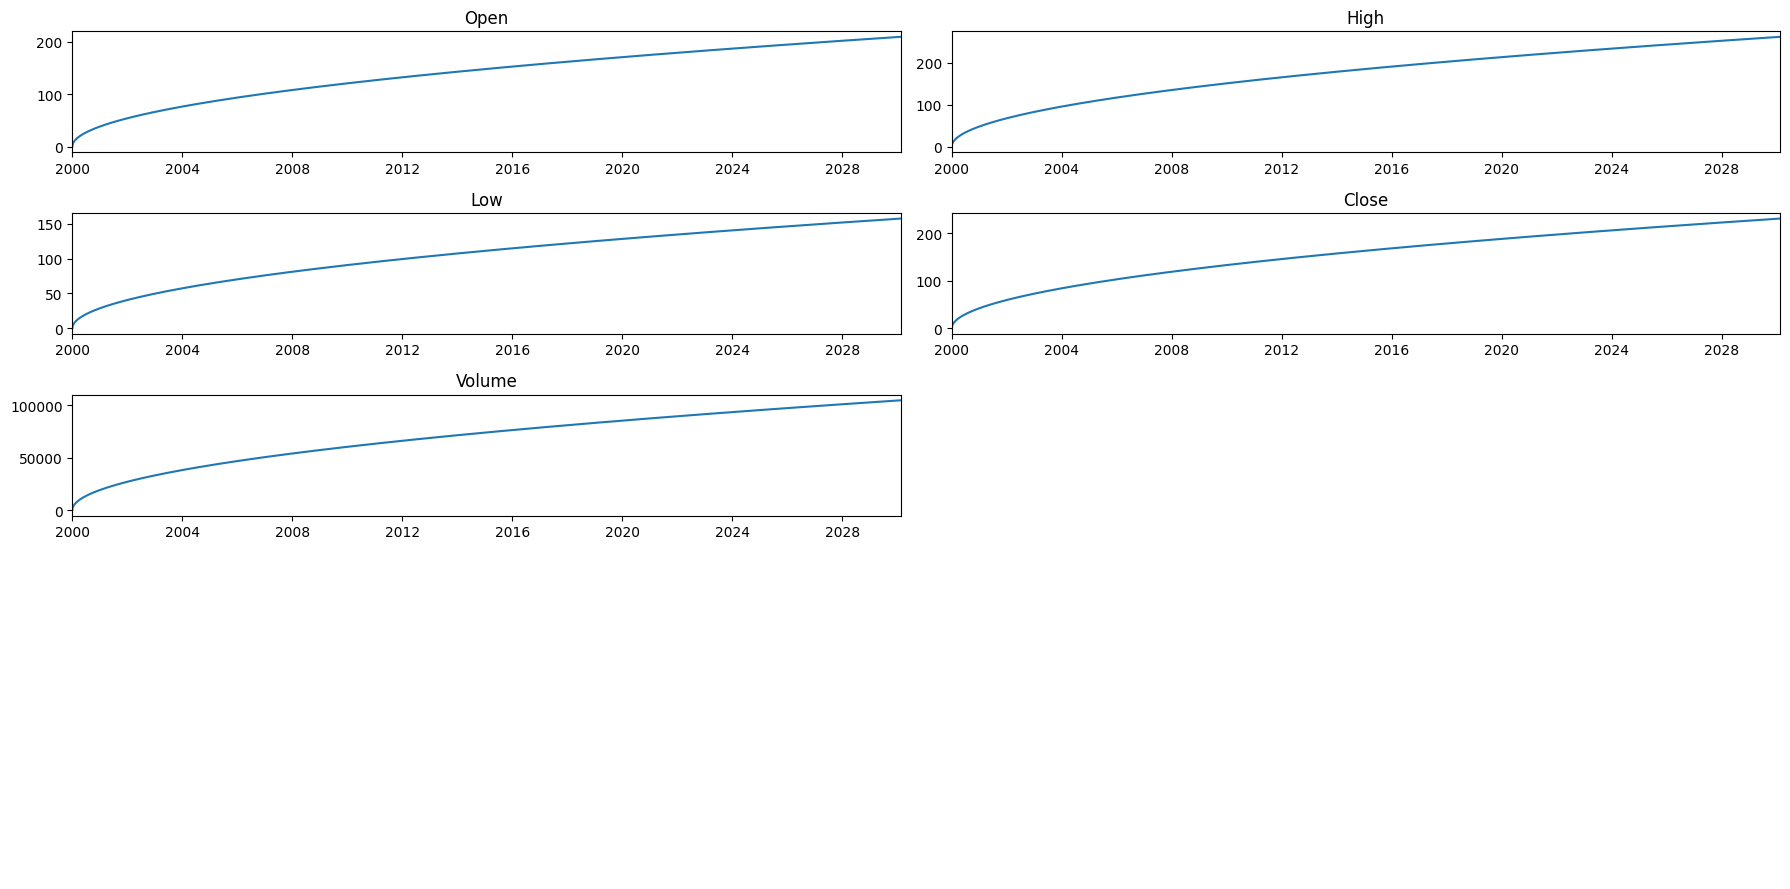

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Generate sample data
dates = pd.date_range(start='1/1/2000', periods=11000)
data = pd.DataFrame({
    'Date': dates,
    'Open': (pd.Series(range(11000)) ** 0.5) * 2,  # Example data for 'Open'
    'High': (pd.Series(range(11000)) ** 0.5) * 2.5,  # Example data for 'High'
    'Low': (pd.Series(range(11000)) ** 0.5) * 1.5,  # Example data for 'Low'
    'Close': (pd.Series(range(11000)) ** 0.5) * 2.2,  # Example data for 'Close'
    'Volume': (pd.Series(range(11000)) ** 0.5) * 1000  # Example data for 'Volume'
})

fig, axs = plt.subplots(5, 2, figsize=(18, 9))

# List of column names to be plotted
columns_to_plot = ['Open', 'High', 'Low', 'Close', 'Volume']

# Plot each dataset in a different subplot
for i, ax in enumerate(axs.flat):
    if i < len(columns_to_plot):
        ax.plot(data['Date'], data[columns_to_plot[i]])
        ax.set_title(columns_to_plot[i])
        ax.set_xlim([data['Date'].min(), data['Date'].max()])
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()


##Model building

In [ ]:
x_train.fillna(x_train.mean(), inplace=True)
x_test.fillna(x_test.mean(), inplace=True)

In [ ]:
y_train.fillna(y_train.mean(), inplace=True)
y_test.fillna(y_test.mean(), inplace=True)

using linear regression

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
print('train score:',lr.score(x_train,y_train))
print('test score:',lr.score(x_test,y_test))

train score: 0.9999100651971895
test score: 0.9998494205258477


In [ ]:
y_pred=lr.predict(x_test)
print('r2 score:',r2_score(y_test,y_pred))
print('mean absolute error:',mean_absolute_error(y_test,y_pred))

r2 score: 0.9998494205258477
mean absolute error: 0.7016780970601769


using decision tree

In [ ]:

from sklearn.tree import DecisionTreeRegressor
det=DecisionTreeRegressor()
det.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
print('test score:',det.score(x_train,y_train))
print('train score:',det.score(x_test,y_test))

test score: 1.0
train score: 0.9977986702512552


In [ ]:
y_pred=det.predict(x_test)
print('r2 score:',r2_score(y_test,y_pred))
print('mean absolute error:',mean_absolute_error(y_test,y_pred))

r2 score: 0.9977986702512552
mean absolute error: 2.157019765898076


###Hyperparameter Tuning

For linear regression


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression # Import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score # Import appropriate metrics


param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False],
    'copy_X': [True, False]
} # Adjusted hyperparameters for LinearRegression

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

# Best parameters and best estimator
best_params = grid_search.best_params_
best_lr = grid_search.best_estimator_

# Predictions and evaluation
y_pred = best_lr.predict(x_test)

# Evaluation metrics for regression
print("Best Parameters:", best_params)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'copy_X': True, 'fit_intercept': False, 'positive': True}
Mean Squared Error: 2.3123559886068095
R-squared: 0.9997722332806338


for decision tree

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor  # Import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score  # Import appropriate metrics

# Assuming x_train, x_test, y_train, y_test are already defined from train_test_split

# Define the parameter grid for GridSearchCV with DecisionTreeRegressor
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a DecisionTreeRegressor instance


# Instantiate GridSearchCV with the decision tree regressor and parameter grid
grid_search = GridSearchCV(estimator=det, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to find the best model parameters
grid_search.fit(x_train, y_train)

# Get the best parameters and best estimator found by GridSearchCV
best_params = grid_search.best_params_
best_dt = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_dt.predict(x_test)

# Evaluate the model performance using metrics for regression
print("Best Parameters:", best_params)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Mean Squared Error: 22.242800736487503
R-squared: 0.9978090874509689


CONSIDERING LINEAR REGRESSION


In [ ]:

# Extract data for AMD
amd_dates = test_data[test_data['Company'] == 0]['Date']
amd_pred = lr.predict(x_test[x_test['Company'] == 0])
amd_orig = test_data[test_data['Company'] == 0]['Close']
# Extract data for ASUS
asus_dates = test_data[test_data['Company'] == 1]['Date']
asus_pred = lr.predict(x_test[x_test['Company'] == 1])
asus_orig = test_data[test_data['Company'] == 1]['Close']

# Extract data for Intel
intel_dates = test_data[test_data['Company'] == 2]['Date']
intel_pred = lr.predict(x_test[x_test['Company'] == 2])
intel_orig = test_data[test_data['Company'] == 2]['Close']

# Extract data for MSI
msi_dates = test_data[test_data['Company'] == 3]['Date']
msi_pred = lr.predict(x_test[x_test['Company'] == 3])
msi_orig = test_data[test_data['Company'] == 3]['Close']

# Extract data for NVIDIA
nvidia_dates = test_data[test_data['Company'] == 4]['Date']
nvidia_pred = lr.predict(x_test[x_test['Company'] == 4])
nvidia_orig = test_data[test_data['Company'] == 4]['Close']


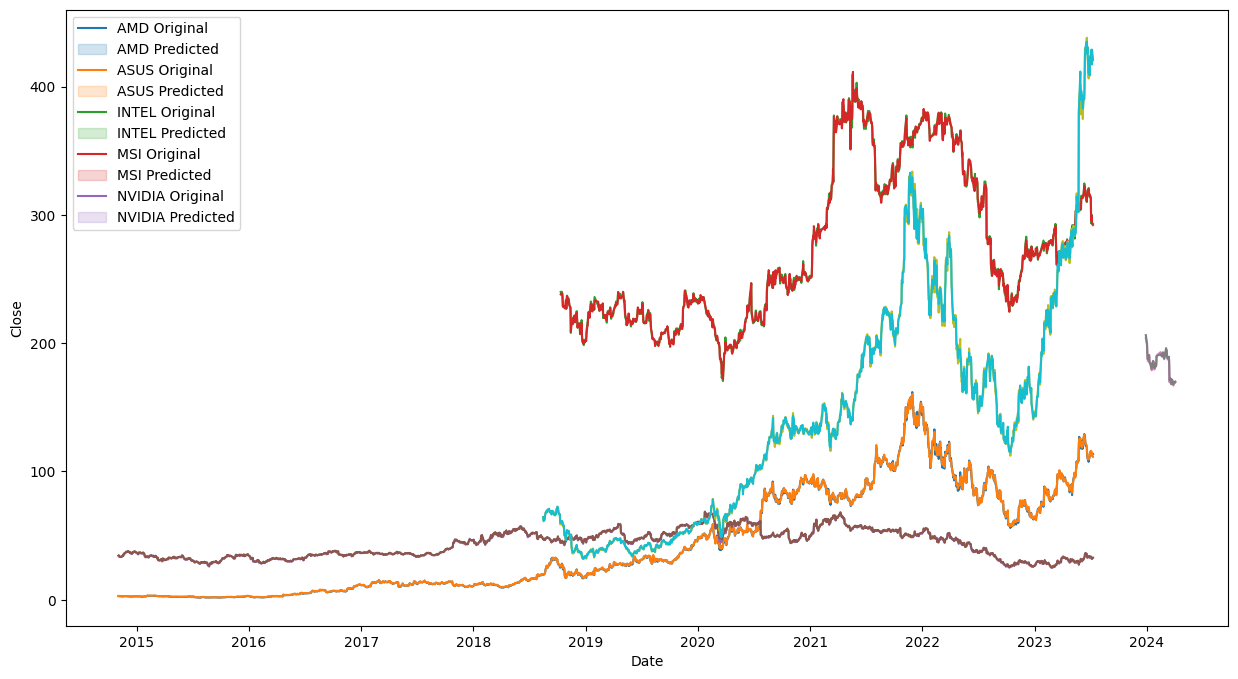

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 8))

sns.lineplot(x=amd_dates, y=amd_orig) # Pass x and y as keyword arguments
sns.lineplot(x=amd_dates, y=amd_pred)

sns.lineplot(x=asus_dates, y=asus_orig)
sns.lineplot(x=asus_dates, y=asus_pred)

sns.lineplot(x=intel_dates, y=intel_orig)
sns.lineplot(x=intel_dates, y=intel_pred)

sns.lineplot(x=msi_dates, y=msi_orig)
sns.lineplot(x=msi_dates, y=msi_pred)

sns.lineplot(x=nvidia_dates, y=nvidia_orig)
sns.lineplot(x=nvidia_dates, y=nvidia_pred)

plt.legend(['AMD Original', 'AMD Predicted',
            'ASUS Original', 'ASUS Predicted',
            'INTEL Original', 'INTEL Predicted',
            'MSI Original', 'MSI Predicted',
            'NVIDIA Original', 'NVIDIA Predicted'])

plt.show()

In [ ]:
import pickle as pkl

In [ ]:
pkl.dump(lr,open('model.pkl','wb'))